In [1]:
import sys; sys.path.append('..')
from os import path

from IPython.display import Image

In [2]:
from collections import deque, defaultdict

In [3]:
from graph import Graph

Step 1. Create a union graph Gu = G1 ∪ G2 from graphs G1 and
G2 (parents).

In [4]:
def union(red, blue):
    
    gg = Graph()
    
    for v, u in red.gen_undirect_edges():
        gg.add_edge(v,u)
    
    for v, u in blue.gen_undirect_edges():
        gg.add_edge(v,u)
        
    return gg

Step 2. Remove all common edges of Gu.

In [5]:
def fork_common_and_distinct(GU, red, blue):
    
    g_common = Graph()
    g_star = Graph()
    
    for v, u in GU.gen_undirect_edges():
        if red.has_edge(v,u) and blue.has_edge(v, u):
            g_common.add_edge(v,u)
        else:
            g_star.add_edge(v,u)
            
    return g_common, g_star

In [6]:
# The steps 1 and 2 can be done in just one function like 

def compose(red, blue):
    '''
    Parameters:
    ----------
        red, blue : Graph
        
    Return:
    -------
        g_union, g_common, g_star : Graph
    '''
    
    g_union  = Graph()
    g_common = Graph()
    g_star   = Graph()
    
    
    for v, u in red.gen_undirect_edges():
        g_union.add_edge(v,u)
        
        if not blue.has_edge(v,u):
            g_star.add_edge(v,u)
    
    for v, u in blue.gen_undirect_edges():
        g_union.add_edge(v,u)
        
        if red.has_edge(v,u):
            g_common.add_edge(v,u)
        else:
            g_star.add_edge(v,u)
            
            
    return g_union, g_common, g_star

Step 3. Find the connected components of Gu. The connected
components with more than one node are candidate components
for recombination.

In [7]:
def connected_component(G_star, red, blue):
    
    vertices = set(G_star.vertices) # complexity O(|vertices|) of this operation
    visited = set()
    components = list()
    stack = deque()
    
    while vertices:
        v = vertices.pop()
        stack.append(v)
        component = {"red" : set() , "blue" : set(), 'has_cycle' : False , 'how_many' : 0}
        
        while stack:
            u = stack.pop()
            visited.add(u)
            vertices.discard(u)
                
            for w in G_star.adjacent_to(u):
                if w not in visited:
                    if w in stack :
                        component['has_cycle'] = True
                        component['how_many'] += 1
                    else:
                        stack.append(w)
                    # if red.has_edge(u, w) and not blue.has_edge(u, w):
                    if red.has_edge(u, w) :
                        component['red'].add((u, w))
                    # elif not red.has_edge(u, w) and blue.has_edge(u, w):
                    if blue.has_edge(u, w):
                        component['blue'].add((u, w))
                    
        components.append(component)
        
    return components

Step 4. For each candidate component, create 2 simplified graphs, one for each parent. 

The simplified graphs contain as vertices only the entry vertices of the candidate component, i.e., vertices connected to at least one edge between vertices located in different candidate components.

The edges of the simplified graphs can be obtained by removing the vertices that are not entry vertices (and linking the neighbor vertices)

In [8]:
# O importante é verificar se os vértices portais são iguais ou se as partições recombinantes se conectam às mesmas
# partições 

# O grafo simplificado pode ser composto por pelo menos um vértices isolado; 
# 

In [9]:
# how to build a simplify graph for this problem?

# def build_simplify_graph(GU, edge_set):
    
#     simplify = Graph()
    
#     return simplify

Step 5. Test each candidate component. If the two simplified
graphs are equal, then the candidate component is a recombining
component.

In [10]:
def test_simplify_graphs(sim_red, sim_blue):
    
    return False

Step 6. The remaining graph is also considered a recombining
component.

Step 7. Apply crossover by selecting the shortest partial solution
inside each recombining component.

In [11]:
def choose_best(GU, component):
    
    weight_red = sum(GU.weight(v,u) for v, u in component['red'])
    weight_blue = sum(GU.weight(v,u) for v, u in component['blue'])
    
    if weight_red <= weight_blue :
        return component['red']

    elif weight_blue < weight_red:
        return component['blue']


In [12]:
def gpx(red, blue):
    
    GU = compose(red, blue)
    
    G_common, G_start = fork_common_and_distinct(GU, red, blue)
    
    portals = set(G_common.vertices) & set(G_start.vertices)
    
    recombinants = list()
    
    for component in connected_component(G_start):
        sim_red  = build_simplify_graph(component, red)
        sim_blue = build_simplify_graph(component, blue)
        
        if test_simplify_graphs(sim_red, sim_blue):
            recombinants.append(component)
        else:
            pass
            # what do I do here?
            
        # choose the best solution. how?
        offspring = Graph()
        for component in recombinants:
            _best = choose_best(GU, component)
            
        
            

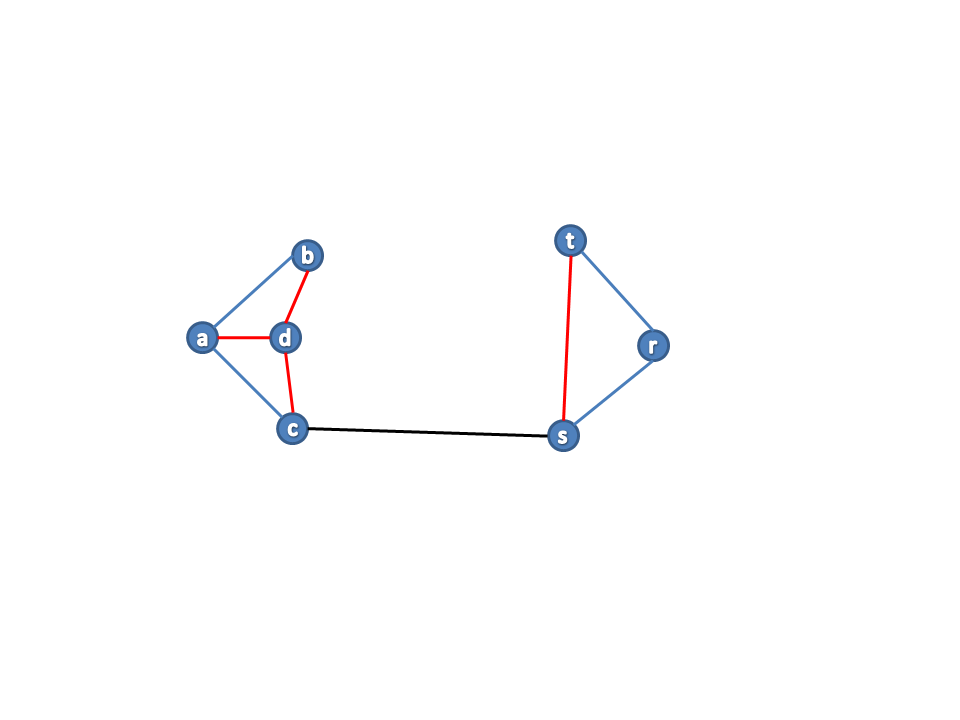

In [33]:
dim = 300
Image(filename=path.join('img', 'grafo_abcd_rst.png'), width=dim, height=dim)

In [13]:
aa = Graph(edges={
    'A' : {'B' : 5, 'C' : 3},
    'C' : {'A' : 3, 'S' : 6},
    'B' : {'A' : 5},
    'R' : {'S' : 4, 'T' : 1},
    'S' : {'R' : 4 , 'C': 6},
    'T' : {'R' : 1}
})

In [14]:
bb = Graph(edges={
    'D' : {'A' : 2, 'C' : 4, 'B': 3},
    'A' : {'D' : 2},
    'C' : {'D' : 4, 'S' : 6},
    'B' : {'D' : 3},
    'T' : {'S' : 10},
    'S' : {'T' : 10, 'C' : 6}
})

In [17]:
GU = union(aa, bb)

In [18]:
g_common, g_star = fork_common_and_distinct(GU, aa, bb)

In [19]:
set(g_common.vertices) 

{'C', 'S'}

In [20]:
set(g_star.vertices)

{'A', 'B', 'C', 'D', 'R', 'S', 'T'}

In [21]:
set(g_common.vertices) & set(g_star.vertices)

{'C', 'S'}

In [22]:
components = connected_component(g_star, aa, bb)

In [23]:
components

[{'red': {('B', 'A'), ('C', 'A')},
  'blue': {('D', 'A'), ('D', 'B'), ('D', 'C')},
  'has_cycle': True,
  'how_many': 2},
 {'red': {('R', 'S'), ('T', 'R')},
  'blue': {('T', 'S')},
  'has_cycle': True,
  'how_many': 1}]

In [24]:
choose_best(GU,components[0])

{('B', 'A'), ('C', 'A')}

In [25]:
choose_best(GU,components[1])

{('T', 'S')}